In [1]:
# standard libraries
import importlib
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import linalg, stats, optimize
import time
import networkx as nx
import sys
sys.path.append('/Users/francescacrucinio/Documents/MD_LVM')

import md_lvm
importlib.reload(md_lvm)
import saem

In [2]:
nodes = 100
pi = np.array([0.6, 0.4])
probs = np.array([[0.25, 0.1], [0.1, 0.2]])

In [3]:
z = np.loadtxt("z.txt")
y = np.loadtxt("adj.txt")

In [4]:
th0 = np.array([0.3, 0.3, 0.3, 0.3, 0.3])  # Initial parameter guess.
X0 = np.random.binomial(1, 0.5, nodes)  # Initial particle cloud.

In [5]:
Niter = 500
N = nodes
gamma = 0.02

In [6]:
theta_md, x_md, W = md_lvm.md_sbm_fast(y, gamma, Niter, N, th0, X0)

In [7]:
theta_md

array([[0.3       , 0.3       , 0.3       , 0.3       , 0.3       ],
       [0.32380952, 0.29640952, 0.29647143, 0.29698571, 0.29747619],
       [0.33717503, 0.29364612, 0.29344204, 0.29365383, 0.2935576 ],
       ...,
       [0.5421046 , 0.24469735, 0.09743665, 0.10871507, 0.20573195],
       [0.5411133 , 0.24486622, 0.09733038, 0.10862467, 0.20574836],
       [0.54106969, 0.24494136, 0.09722575, 0.10846046, 0.20583312]])

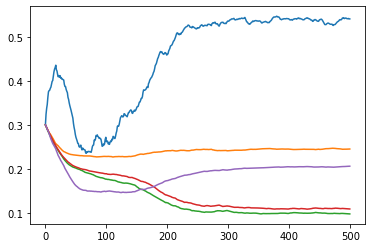

In [8]:
plt.plot(theta_md)

In [9]:
saem.sbm_ari(z-1, x_md[-1,:])

0.8824242424242424